In [20]:
import torch
import torch.nn as nn
from torchinfo import summary
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2
import torchvision.models as models
from PIL import Image
from torch.utils.data import DataLoader,Dataset         #데이터셋 관련 모듈
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score
import torch.optim.lr_scheduler as lr_scheduler


In [21]:
train_dir='./data/train/'
test_dir='./data/test/'

In [22]:
transform = v2.Compose(
    [
    v2.Resize([224,224]),
    v2.RandomResizedCrop(224),
    v2.ToImage(),
    v2.ConvertImageDtype(torch.float),
    v2.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]),
    v2.ToDtype(torch.uint8, scale=True)
    ]
)

In [23]:
train_ds=ImageFolder(root=train_dir,transform=transform)
train_dl=DataLoader(train_ds,batch_size=32,shuffle=True)

In [24]:
test_ds=ImageFolder(root=test_dir,transform=transform)
test_dl=DataLoader(test_ds,batch_size=32,shuffle=True)

In [25]:
print(f'train_ds.classes       : {train_ds.classes}')
print(f'train_ds.class_to_idx  : {train_ds.class_to_idx}')
print(f'train_ds.targets       : {train_ds.targets}')
for img in train_ds.imgs:
    print(f'train_ds.imgs       : {img}')

train_ds.classes       : ['0', '1']
train_ds.class_to_idx  : {'0': 0, '1': 1}
train_ds.targets       : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

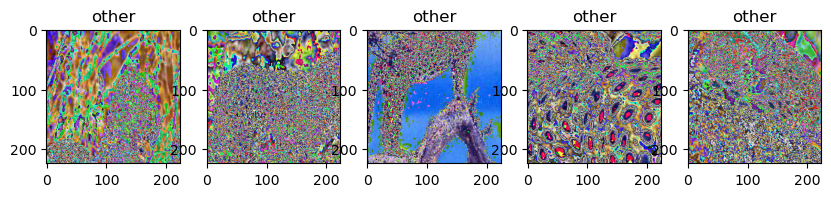

In [26]:
label_names=train_ds.classes
classes={0:'other', 1:'LION'}
fig,axes=plt.subplots(1,5,figsize=(10,4))
for idx,(img_data,target) in enumerate(train_ds):
    axes[idx].imshow(img_data.permute(1,2,0))
    axes[idx].set_title(classes[target])
    if idx==4: break
plt.show()

In [27]:
model=models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

In [28]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [29]:
summary(model)

Layer (type:depth-idx)                   Param #
VGG                                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       1,792
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       36,928
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
│    └─Conv2d: 2-6                       73,856
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       147,584
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
│    └─Conv2d: 2-11                      295,168
│    └─ReLU: 2-12                        --
│    └─Conv2d: 2-13                      590,080
│    └─ReLU: 2-14                        --
│    └─Conv2d: 2-15                      590,080
│    └─ReLU: 2-16                        --
│    └─MaxPool2d: 2-17                   --
│    └─Conv2d: 2-18                      1,180,160
│    └─ReLU: 2-19                

In [30]:
for named,param in model.named_parameters():
    print(f'[{named}] - {param.shape}')
    
    param.requires_grad=False

[features.0.weight] - torch.Size([64, 3, 3, 3])
[features.0.bias] - torch.Size([64])
[features.2.weight] - torch.Size([64, 64, 3, 3])
[features.2.bias] - torch.Size([64])
[features.5.weight] - torch.Size([128, 64, 3, 3])
[features.5.bias] - torch.Size([128])
[features.7.weight] - torch.Size([128, 128, 3, 3])
[features.7.bias] - torch.Size([128])
[features.10.weight] - torch.Size([256, 128, 3, 3])
[features.10.bias] - torch.Size([256])
[features.12.weight] - torch.Size([256, 256, 3, 3])
[features.12.bias] - torch.Size([256])
[features.14.weight] - torch.Size([256, 256, 3, 3])
[features.14.bias] - torch.Size([256])
[features.17.weight] - torch.Size([512, 256, 3, 3])
[features.17.bias] - torch.Size([512])
[features.19.weight] - torch.Size([512, 512, 3, 3])
[features.19.bias] - torch.Size([512])
[features.21.weight] - torch.Size([512, 512, 3, 3])
[features.21.bias] - torch.Size([512])
[features.24.weight] - torch.Size([512, 512, 3, 3])
[features.24.bias] - torch.Size([512])
[features.26.we

In [31]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [32]:
model.classifier[6]=nn.Linear(in_features=4096,out_features=1)

In [33]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1, bias=True)
)

In [34]:
criterion=nn.BCEWithLogitsLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)
scheduler=lr_scheduler.ReduceLROnPlateau(optimizer,mode='max',patience=10,verbose=True)

c:\Users\desktop\anaconda3\envs\TORCH_CV_38\lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [15]:
def train_model(model,dataloader,criterion,optimizer,num_epoch=10):
    
    loss_history=[]
    score_history=[]
    best_score=0
    
    model.train()

    for epoch in range(num_epoch):
        total_loss=0
        total_score=0

        for inputs,labels in dataloader:
            inputs=inputs.float()
            labels=labels.float().view(-1,1)

            optimizer.zero_grad()
            outputs=model(inputs)
            loss=criterion(outputs,labels)
            preds = torch.round(outputs)
            loss.backward()
            optimizer.step()

            total_loss+=loss.item()
            total_score+=torch.sum(preds==labels.data)

        avg_loss=total_loss/len(dataloader.dataset)
        avg_score=total_score.double()/len(dataloader.dataset)

        print(f'[{epoch+1}/{num_epoch}]')
        print(f'[TRAIN] Loss: {avg_loss}, Score: {avg_score}')

        if avg_score > best_score:
            best_score=avg_score

        score_history.append(avg_score.item())
        loss_history.append(avg_loss)

        torch.save(model.state_dict(), 'vgg16_lion_classifier.pth')
        print()

    print('best score:',best_score)
    
    return loss_history,score_history

In [35]:
## models 폴더 아래 프로젝트 폴더 아래 모델 파일저장
import os

# 저장 경로
SAVE_PATH = './models/'
# 저장 파일명
SAVE_FILE = 'lion_model_train_wbs.pth'
# 저장 모델구조 및 파라미터 모두 저장
SAVE_MODEL = 'lion_model_all.pth'

if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

In [38]:
epochs=100
loss_history=[[],[]]
score_history=[[],[]]

for epoch in range(epochs):
    model.train()
    
    epoch_loss=0
    train_pred=[]
    train_true=[]

    for features,targets in train_dl:
        optimizer.zero_grad()

        outputs=model(features.float()).view(-1)
        predicted=torch.round(torch.sigmoid(outputs))
        loss=criterion(outputs,targets.float())

        loss.backward()
        optimizer.step()

        epoch_loss+=loss.item()
        train_pred.extend(predicted.detach().cpu().numpy())
        train_true.extend(targets.detach().cpu().numpy())

    train_f1=f1_score(train_pred,train_true)
    avg_loss_train=epoch_loss/len(train_dl)
    print(f'EPOCH [{epoch+1}/{epochs}]')
    print(f'[TRAIN] Loss: {avg_loss_train}, Score: {train_f1}')

    loss_history[0].append(avg_loss_train)
    score_history[0].append(train_f1)

    model.eval()
    y_pred=[]
    y_true=[]
    y_loss=0

    with torch.no_grad():
        for features,targets in test_dl:

            outputs=model(features.float()).view(-1)
            predicted=torch.round(torch.sigmoid(outputs))

            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(targets.cpu().numpy())

            loss=criterion(outputs,targets.float())
            y_loss+=loss.item()

        test_f1=f1_score(y_true,y_pred)
        avg_loss_test=epoch_loss/len(test_dl)

        print(f'[TEST] Loss: {avg_loss_test}, Score: {test_f1}')

        loss_history[1].append(avg_loss_test)
        score_history[1].append(test_f1)

    scheduler.step(loss)
    print()
    print(f'scheduler.num_bad_epochs: {scheduler.num_bad_epochs}',end=' ')
    print(f'scheduler.patience: {scheduler.patience}')
    print()

    if len(score_history[1]) == 1:

        # 첫번째라서 무조건 모델 파라미터 저장
        torch.save(model.state_dict(),SAVE_PATH+SAVE_FILE)

        # 모델 전체 저장
        torch.save(model,SAVE_PATH+SAVE_MODEL)

    else:
        if score_history[1][-1] >= max(score_history[1]):
            torch.save(model.state_dict(),SAVE_PATH+SAVE_FILE)
            # 모델 전체 저장
            torch.save(model,SAVE_PATH+SAVE_MODEL)

    #손실 감소(성능 개선) 안 되는 경우 조기 종료
    if scheduler.num_bad_epochs >= scheduler.patience:
        print()
        print(f'{scheduler.patience} EPOCH 성능 개선 없어서 조기 종료')
        break

c:\Users\desktop\anaconda3\envs\TORCH_CV_38\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [1/100]
[TRAIN] Loss: 2.2364826798439026, Score: 0.5998887033945466
[TEST] Loss: 15.841752315560976, Score: 0.4722222222222222

scheduler.num_bad_epochs: 0 scheduler.patience: 10



c:\Users\desktop\anaconda3\envs\TORCH_CV_38\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [2/100]
[TRAIN] Loss: 2.279692780270296, Score: 0.5938375350140055
[TEST] Loss: 16.14782386024793, Score: 0.5075528700906345

scheduler.num_bad_epochs: 0 scheduler.patience: 10



c:\Users\desktop\anaconda3\envs\TORCH_CV_38\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [3/100]
[TRAIN] Loss: 2.0866053777582505, Score: 0.6269146608315097
[TEST] Loss: 14.780121425787607, Score: 0.3888888888888889

scheduler.num_bad_epochs: 1 scheduler.patience: 10



c:\Users\desktop\anaconda3\envs\TORCH_CV_38\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [4/100]
[TRAIN] Loss: 2.2073221369701272, Score: 0.5973451327433628
[TEST] Loss: 15.635198470205069, Score: 0.5108695652173914

scheduler.num_bad_epochs: 2 scheduler.patience: 10



c:\Users\desktop\anaconda3\envs\TORCH_CV_38\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


EPOCH [5/100]
[TRAIN] Loss: 2.036537792402155, Score: 0.6375207526286664
[TEST] Loss: 14.425476029515266, Score: 0.5851528384279476

scheduler.num_bad_epochs: 3 scheduler.patience: 10



KeyboardInterrupt: 

In [16]:
param_to_update=[]
for name, param in model.named_parameters():
    if param.requires_grad==True:
        param_to_update.append(param)

optimizer=optim.Adam(param_to_update,lr=0.001)

In [17]:
train_loss,train_score=train_model(model,lion_dl,loss,optimizer)

c:\Users\desktop\anaconda3\envs\TORCH_CV_38\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[1/10]
[TRAIN] Loss: 0.09559939067689177, Score: 0.024480712166172106

[2/10]
[TRAIN] Loss: 0.07124442030753089, Score: 0.02744807121661721

[3/10]
[TRAIN] Loss: 0.06461836643052737, Score: 0.02373887240356083

[4/10]
[TRAIN] Loss: 0.06249891890306855, Score: 0.026706231454005934

[5/10]
[TRAIN] Loss: 0.08064960592180402, Score: 0.027077151335311574

[6/10]
[TRAIN] Loss: 0.0664860891283266, Score: 0.02559347181008902

[7/10]
[TRAIN] Loss: 0.0713162478778058, Score: 0.02596439169139466

[8/10]
[TRAIN] Loss: 0.07401294997431758, Score: 0.028189910979228485

[9/10]
[TRAIN] Loss: 0.062580688287247, Score: 0.022997032640949554

[10/10]
[TRAIN] Loss: 0.06037121529080173, Score: 0.02336795252225519

best score: tensor(0.0282, dtype=torch.float64)
